In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import json
%matplotlib inline

In [7]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))
# learned from youtube video brandon rhodes on pandas

In [22]:
df = pd.read_csv('teams/grizzlies1996.csv')

In [24]:
df

,Rk,G,Date,Unnamed: 3,Opp,W/L,Tm,Opp.1,FG,FGA,...,FT.1,FTA.1,FT%.1,ORB.1,TRB.1,AST.1,STL.1,BLK.1,TOV.1,PF.1
0,1,1,1995-11-03,@,POR,W,92,80,33,75,...,17,30,0.567,23,51,20,11,3,26,25
1,2,2,1995-11-05,NaN,MIN,W,100,98,36,79,...,20,27,0.741,18,46,23,7,3,16,33
2,3,3,1995-11-07,@,DAL,L,88,99,33,77,...,14,14,1.000,21,58,24,10,3,17,20
3,4,4,1995-11-08,@,SAS,L,62,111,22,78,...,26,33,0.788,10,44,30,10,11,14,18
4,5,5,1995-11-10,NaN,LAC,L,91,98,29,61,...,23,34,0.676,19,40,28,11,7,22,28
5,6,6,1995-11-11,@,SEA,L,81,117,32,86,...,23,33,0.697,10,49,26,8,5,11,18
6,7,7,1995-11-13,NaN,DAL,L,89,94,38,91,...,33,38,0.868,31,65,15,5,5,11,19
7,8,8,1995-11-16,@,LAC,L,98,103,38,73,...,20,31,0.645,18,49,14,10,2,16,24
8,9,9,1995-11-17,NaN,LAL,L,91,114,31,72,...,22,31,0.710,15,38,28,11,6,11,25
9,10,10,1995-11-19,@,NYK,L,93,98,34,74,...,14,17,0.824,10,36,17,8,3,13,16


In [25]:
ast_reb_wonww= df[(df['AST']>df['AST.1']) & (df['TRB']>df['TRB.1']) & (df['W/L']=='W')]

In [28]:
wins = df[df['W/L']=='W']
loss = df[df['W/L']=='L']
orebounds_won= df[df['ORB']>df['ORB.1']]
orebounds_loss= df[df['ORB']<df['ORB.1']]
trebounds_won= df[df['TRB']>df['TRB.1']]
trebounds_loss= df[df['TRB']<df['TRB.1']]
assist_won= df[df['AST']>df['AST.1']]
assist_loss= df[df['AST']<df['AST.1']]
turnover_w= df[df['TOV']>df['TOV.1']]
turnover_l= df[df['TOV']<df['TOV.1']]
steal_won= df[df['STL']>df['STL.1']]
steal_loss= df[df['STL']<df['STL.1']]
assist_won= df[df['AST']>df['AST.1']]
assist_loss= df[df['AST']<df['AST.1']]
blocks_won= df[df['BLK']>df['BLK.1']]
blocks_loss= df[df['BLK']<df['BLK.1']]

In [29]:
wrebounds_won=trebounds_won[trebounds_won["W/L"] =="W"]
wassist_won=assist_won[assist_won['W/L']=='W']
astreb = assist_won[assist_won['TRB'] > assist_won['TRB.1']]
astrebw = astreb[astreb['W/L']=='W']

In [30]:
wpct = (len(wrebounds_won)) / (len(trebounds_won))
wwpct = (len(wassist_won)) / (len(assist_won))
wwwpct = len(astrebw)/len(astreb)

In [33]:
loss


,Rk,G,Date,Unnamed: 3,Opp,W/L,Tm,Opp.1,FG,FGA,...,FT.1,FTA.1,FT%.1,ORB.1,TRB.1,AST.1,STL.1,BLK.1,TOV.1,PF.1
2,3,3,1995-11-07,@,DAL,L,88,99,33,77,...,14,14,1.000,21,58,24,10,3,17,20
3,4,4,1995-11-08,@,SAS,L,62,111,22,78,...,26,33,0.788,10,44,30,10,11,14,18
4,5,5,1995-11-10,NaN,LAC,L,91,98,29,61,...,23,34,0.676,19,40,28,11,7,22,28
5,6,6,1995-11-11,@,SEA,L,81,117,32,86,...,23,33,0.697,10,49,26,8,5,11,18
6,7,7,1995-11-13,NaN,DAL,L,89,94,38,91,...,33,38,0.868,31,65,15,5,5,11,19
7,8,8,1995-11-16,@,LAC,L,98,103,38,73,...,20,31,0.645,18,49,14,10,2,16,24
8,9,9,1995-11-17,NaN,LAL,L,91,114,31,72,...,22,31,0.710,15,38,28,11,6,11,25
9,10,10,1995-11-19,@,NYK,L,93,98,34,74,...,14,17,0.824,10,36,17,8,3,13,16
10,11,11,1995-11-22,@,ORL,L,93,95,36,78,...,27,37,0.730,16,43,23,6,9,11,21
11,12,12,1995-11-24,@,CHH,L,104,116,39,87,...,21,29,0.724,9,38,29,4,3,19,27


In [16]:
print ("The Team won :", str(len(wins)), 'Games')
print ("The Team lost :", str(len(loss)), 'Games')
print ()
print ("The Team got more Assists than the Opponents:", str(len(assist_won)), 'Games')
print ("The Team got less Assists than the Opponents:", str(len(assist_loss)), 'Games')
print()
print ("The Team got more Rebounds the Opponents:", str(len(trebounds_won)), 'Games')
print ("The Team got less Rebounds by the Opponents:", str(len(trebounds_loss)), 'Games')
print()
print ("The Team got more Offensive Rebounds than the Opponents:", str(len(orebounds_won)), 'Games')
print ("The Team got less Offensive Rebounds than the Opponents:", str(len(orebounds_loss)), 'Games')
print()
print ("The Team Turned Over the Ball less than the opponents in:", str(len(trebounds_won)), 'Games')
print ("The Team Turned Over the Ball more than the opponents in:", str(len(trebounds_loss)), 'Games')
print()
print ("The Team got more Steals than the Opponents:", str(len(steal_won)), 'Games')
print ("The Team got less Steals than the Opponents:", str(len(steal_loss)), 'Games')
print()
print ("The Team got more Blocks than the Opponents:", str(len(blocks_won)), 'Games')
print ("The Team got less Blocks than the Opponents:", str(len(blocks_loss)), 'Games')
print()
print("With the edge in Rebounding in, they were able to capitalize in", str(len(wrebounds_won)), 'of' , str(len(trebounds_won)))
print('A Percentage of', str(wpct), 'percent')
print()
print("With the edge in Assist in, they were able to capitalize in", str(len(wassist_won)), 'of' , str(len(assist_won)))
print('A Percentage of', str(wwpct), 'percent')
print()
print("With the edge in Rebounding in and assist, they were able to capitalize in ", str(len(astrebw)), 'of' , str(len(astreb)))
print('A Percentage of', str(wwwpct), 'percent')



('The Team won :', '72', 'Games')
('The Team lost :', '10', 'Games')
()
('The Team got more Assists than the Opponents:', '67', 'Games')
('The Team got less Assists than the Opponents:', '13', 'Games')
()
('The Team got more Rebounds the Opponents:', '63', 'Games')
('The Team got less Rebounds by the Opponents:', '17', 'Games')
()
('The Team got more Offensive Rebounds than the Opponents:', '60', 'Games')
('The Team got less Offensive Rebounds than the Opponents:', '20', 'Games')
()
('The Team Turned Over the Ball less than the opponents in:', '63', 'Games')
('The Team Turned Over the Ball more than the opponents in:', '17', 'Games')
()
('The Team got more Steals than the Opponents:', '54', 'Games')
('The Team got less Steals than the Opponents:', '18', 'Games')
()
('The Team got more Blocks than the Opponents:', '38', 'Games')
('The Team got less Blocks than the Opponents:', '27', 'Games')
()
('With the edge in Rebounding in, they were able to capitalize in', '56', 'of', '63')
('A Per

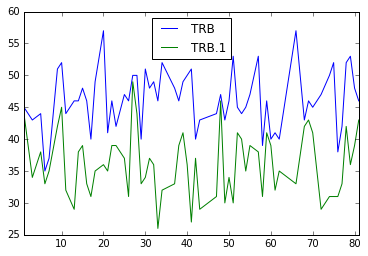

In [17]:
trebounds_won.plot(y=['TRB', 'TRB.1'])

In [18]:
df.plot(x=df.TRB.sum(), y= df.TRB.sum(), kind='pie')

IndexError: index 3658 is out of bounds for axis 0 with size 41

In [19]:
df.TRB.sum()

3658

In [46]:
df.count

<bound method DataFrame.count of     Rk   G        Date Unnamed: 3  Opp W/L   Tm  Opp.1  FG  FGA  ...   FT.1  \
0    1   1  1995-11-03        NaN  CHH   W  105     91  43   86  ...     16   
1    2   2  1995-11-04        NaN  BOS   W  107     85  43   88  ...     25   
2    3   3  1995-11-07        NaN  TOR   W  117    108  44   80  ...     30   
3    4   4  1995-11-09          @  CLE   W  106     88  41   79  ...     19   
4    5   5  1995-11-11        NaN  POR   W  110    106  40   81  ...     18   
5    6   6  1995-11-14          @  ORL   L   88     94  35   89  ...     25   
6    7   7  1995-11-15        NaN  CLE   W  113     94  43   77  ...     14   
7    8   8  1995-11-17        NaN  NJN   W  109     94  45   87  ...     25   
8    9   9  1995-11-21          @  DAL   W  108    102  42   93  ...     22   
9   10  10  1995-11-22          @  SAS   W  103     94  41   92  ...     27   
10  11  11  1995-11-24          @  UTA   W   90     85  31   76  ...     16   
11  12  12  1995-11

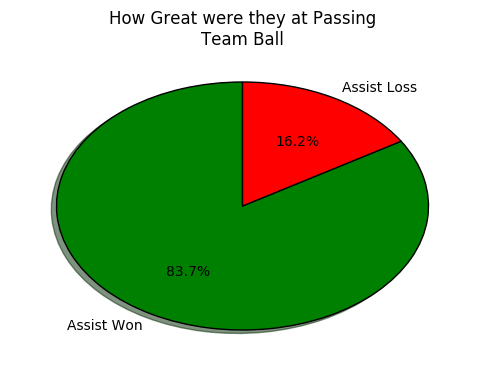

In [55]:
slices = [ len(assist_won) , len(assist_loss) ]
activities = ['Assist Won','Assist Loss']
cols = ['g','r']

plt.pie(slices,
        labels=activities,
        colors=cols,
        startangle=90,
        shadow= True,

        autopct='%1.1f%%')

plt.title('How Great were they at Passing\nTeam Ball')
plt.show()

In [ ]:
print ("The Team got more Assists than the Opponents:", str(len(assist_won)), 'Games')
print ("The Team got less Assists than the Opponents:", str(len(assist_loss)), 'Games')

In [ ]:
[] {}

In [56]:
(not gonna change)

SyntaxError: invalid syntax (<ipython-input-56-ff05304996f5>, line 1)